In [5]:
pip install pennylane

     ---------------------------------------- 14.6/14.6 MB 1.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\envs\\tf\\Lib\\site-packages\\~~mpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [6]:
pip install pennylane


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pprint


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pprint (from versions: none)
ERROR: No matching distribution found for pprint


In [2]:
#!pip install matplotlib 
import random
import matplotlib.pyplot as plt
from pprint import pprint 

import numpy as np
import pennylane as qml
from pennylane.operation import Tensor

#pip install pennylane
#https://pennylane.readthedocs.io/en/stable/introduction/templates.html

In [5]:
dev1 = qml.device("default.qubit", wires=2) #wires = # of qubits/qumodes

In [6]:
@qml.qnode(dev1)
def circuit0(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    return qml.expval(qml.PauliZ(0)) #0 or 1: Z, + or -: X, +i or -i: Y

In [7]:
dev2 = qml.device("default.qubit", wires=4)

In [8]:
pparams = [0.5, 0.3]
n_qubits = 4
paulis = []
for i in range(n_qubits):
    paulis.append(qml.PauliZ(i))

@qml.qnode(dev2)
def circuitGates(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.Rot(0, np.pi/2, 0, wires=2) #X, Y, Z
    qml.CNOT(wires=[0, 1])
    qml.SWAP(wires=[0, 3])
    qml.CSWAP(wires=[1, 2, 3])
    qml.QFT(wires=[0, 1, 2])
    qml.Toffoli(wires=[1, 2, 3])
    qml.MultiControlledX([0, 2, 3], 1)
    qml.U1(np.pi/6, wires=3)
    qml.U2(np.pi/2, -np.pi/5, wires=2)
    qml.U3(-11*np.pi/12, 4*np.pi/5, np.pi, wires=1)
    return qml.expval(Tensor(*paulis))
#Regular Qubit Gates
#Quantum Trapped Ion Qubit Gates

In [9]:
circuitGates(pparams)

C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\pennylane\ops\qubit\non_parametric_ops.py:2289: UserWarning: The control_wires keyword will be removed soon. Use wires = (control_wires, target_wire) instead. See the documentation for more information.
  warnings.warn(


tensor(0.529439, requires_grad=True)

In [11]:
#Basis States
pparams = [0, 1, 1, 1]
    
@qml.qnode(dev2)
def circuitBasis(params):
    qml.BasisState(params, wires=[0, 1, 2, 3])
    return [qml.expval(qml.PauliZ(i)) for i in range(4)]


In [12]:
#list(pparams)
print(pparams)
circuitBasis(pparams)

[0, 1, 1, 1]


AttributeError: 'list' object has no attribute 'tolist'

In [13]:
#2^n params, for n qubits

#State Vectors
@qml.qnode(dev2)
def circuitState(params):
    qml.QubitStateVector(params, wires=[0, 1, 2, 3])
    return [qml.expval(qml.PauliZ(i)) for i in range(4)]

In [14]:
pparams = [0 for i in range(2**n_qubits)]
pparams[5] = 1
print(pparams)
circuitState(pparams)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


tensor([ 1., -1.,  1., -1.], requires_grad=True)

In [15]:
#Not all Quantum Computers are perfect, we have errors!
#Simulate Errors, we use quantum Channels
shots=random.randint(1, 50)
dev3 = qml.device("default.mixed", wires=4, shots=shots)
@qml.qnode(dev3)
def circuitNoise(params):
    qml.RX(params[0], wires=3)
    qml.RY(params[1], wires=1)
    qml.AmplitudeDamping(0.1, wires=0)
    qml.PhaseDamping(0.1, wires=1) #Phase of \ket{1}
    qml.BitFlip(0.5, wires=2) #flip 0 to 1, or 1 to 0 if occurs
    qml.PhaseFlip(0.5, wires=3) #1 to -1, or -1 to 1
    return [qml.expval(qml.PauliZ(i)) for i in range(4)]

In [16]:
pparams=[0, 0]
for i in range(10):
    print(circuitNoise(pparams))

[ 1.          1.         -0.33333333  1.        ]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[ 1.          1.         -0.33333333  1.        ]
[1.         1.         0.33333333 1.        ]
[1.         1.         0.33333333 1.        ]
[1.         1.         0.33333333 1.        ]
[ 1.          1.         -0.33333333  1.        ]
[1.         1.         0.33333333 1.        ]
[1.         1.         0.33333333 1.        ]


In [17]:
@qml.qnode(dev2)
def circuitObs1(params):
    qml.RX(params[0], wires=3)
    qml.RY(params[1], wires=1)
    return qml.expval(qml.PauliX(0) @ qml.PauliY(1) @ qml.PauliZ(2))

In [18]:
@qml.qnode(dev2)
def circuitObs2(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    return qml.expval(qml.Hadamard(0))

In [19]:
pparams=[0, 0]
circuitObs1(pparams)

tensor(0., requires_grad=True)

In [20]:
pparams=[random.randint(0,2)*np.pi/2, 0]
circuitObs2(pparams)

tensor(-0.70710678, requires_grad=True)

In [21]:
n_qumodes = 4 #Quantum Optical Devices
dev4 = qml.device("default.gaussian", wires=n_qumodes)
@qml.qnode(dev4)
def circuitCVGates():
    qml.Displacement(2, np.pi/4, wires=0)
    qml.Squeezing(0.3, -3*np.pi/2, wires=1)
    qml.Beamsplitter(7*np.pi/8, -2*np.pi/5, wires=range(2, 4))
    return qml.expval(qml.NumberOperator(wires=2))

In [22]:
circuitCVGates()

tensor(0., requires_grad=True)

In [3]:

n_qumodes = 4
dev5 = qml.device("strawberryfields.fock", cutoff_dim=6, wires=n_qumodes)


@qml.qnode(dev5)
def circuitCVPrep():
    qml.FockState(3, wires=2)
    qml.Beamsplitter(np.pi/4, np.pi/2, wires=range(2, 4))
    qml.DisplacedSqueezedState(0.4, np.pi/3, 3, -9*np.pi/5, wires=0)
    qml.Beamsplitter(np.pi/4, np.pi/2, wires=[0, 3])
    return [qml.expval(qml.NumberOperator(wires=2)), qml.expval(qml.NumberOperator(wires=0))]



In [4]:
@qml.qnode(dev5)
def circuitCVObs1():
    qml.FockState(1, wires=2)
    qml.Beamsplitter(np.pi/4, np.pi/2, wires=range(2, 4))
    qml.DisplacedSqueezedState(0.4, np.pi/3, 3, -9*np.pi/5, wires=0)
    qml.Beamsplitter(np.pi/4, np.pi/2, wires=[0, 3])
    return qml.expval(qml.X(wires=2))

@qml.qnode(dev5)
def circuitCVObs2():
    qml.FockState(1, wires=2)
    qml.Beamsplitter(np.pi/4, np.pi/2, wires=range(2, 4))
    qml.DisplacedSqueezedState(0.4, np.pi/3, 3, -9*np.pi/5, wires=0)
    qml.Beamsplitter(np.pi/4, np.pi/2, wires=[0, 3])
    return qml.expval(qml.P(wires=2))

@qml.qnode(dev5)
def circuitCVObs3():
    qml.FockState(2, wires=0)
    qml.FockState(2, wires=1)
    qml.Beamsplitter(np.pi/5, 0, wires=range(2))
    return qml.expval(qml.FockStateProjector([1, 3], wires=[0, 1]))


In [5]:
print(circuitCVObs1())
print()
print(circuitCVObs2())
print()
print(circuitCVObs3())

1.3010426069826053e-18

-2.439454888092384e-19

0.1295593135546973


In [ ]:
pip install PennyLane-SF

In [6]:
import random
import matplotlib.pyplot as plt
from pprint import pprint

from pennylane import numpy as np
import pennylane as qml
from pennylane.templates import AngleEmbedding, AmplitudeEmbedding, BasisEmbedding
from pennylane.operation import Tensor
#https://pennylane.readthedocs.io/en/stable/introduction/templates.html

In [7]:
dev1 = qml.device("default.qubit", wires=2)

In [8]:
@qml.qnode(dev1)
def circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    return qml.expval(qml.PauliZ(0)) #0 or 1: Z, + or -: X, +i or -i: Y

In [9]:
pparams = [0.5, 0.3] #b/w 0 and 1
n_qubits = len(pparams) #1 qubit per data point
paulis = []
for i in range(n_qubits):
    paulis.append(qml.PauliZ(i))
print("Qubits:",n_qubits, "\tTensor Product:", Tensor(*paulis))
@qml.qnode(dev1)
def circuit(params):
    AngleEmbedding(params, wires=range(n_qubits))
    return qml.expval(Tensor(*paulis)) # qml.PauliZ(0) @ qml.PauliZ(1)) #<< Tensor Product

Qubits: 2 	Tensor Product: PauliZ(wires=[0]) @ PauliZ(wires=[1])


In [10]:
print(circuit(pparams))

0.8383866435942032


In [11]:
dev2 = qml.device("default.qubit", wires=2)
pparams = [1, 2, 3, 7] #input data
pparams = [float(i) for i in pparams] #floatafy
print(pparams)
n_qubits = int(np.log2(len(pparams))) #for 4 data points, u need 2 qubits

print("Qubits:",n_qubits, "\tTensor Product:", Tensor(*paulis))
@qml.qnode(dev2)
def circuit(params):
    AmplitudeEmbedding(params, wires=range(n_qubits), normalize=True)
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

[1.0, 2.0, 3.0, 7.0]
Qubits: 2 	Tensor Product: PauliZ(wires=[0]) @ PauliZ(wires=[1])


In [12]:
print(circuit(pparams))

[-0.84126984 -0.68253968]


In [13]:
np.random.seed(8)
n_qubits = 24
dev3 = qml.device("default.qubit", wires=n_qubits)
pparams = [] #input data
for i in range(n_qubits):
    k = 0
    if (random.randint(-100,100) < 0):
        j = random.randint(-70,-30)/100
        p = random.randint(-70,-30)/100
    else:
        j = random.randint(30,70)/100
        p = random.randint(30,70)/100
    if j > 0:
        k = 1
    pparams.append([k, [j, p]])
pprint(pparams[:10])
print("Qubits:",n_qubits)
@qml.qnode(dev3)
def circuit(params):
    BasisEmbedding(params, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

[[0, [-0.46, -0.63]],
 [1, [0.42, 0.35]],
 [1, [0.55, 0.42]],
 [0, [-0.56, -0.37]],
 [0, [-0.36, -0.54]],
 [0, [-0.37, -0.31]],
 [0, [-0.57, -0.39]],
 [1, [0.62, 0.43]],
 [0, [-0.49, -0.67]],
 [1, [0.4, 0.5]]]
Qubits: 24


Text(0, 0.5, 'Y Coord')

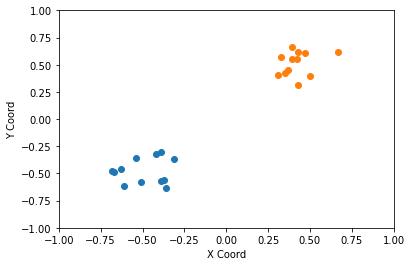

In [14]:
result1 = [i[1][1] for i in pparams if i[0] == 0]
datainput1 = [i[1][0] for i in pparams if i[0] == 0]

result2 = [i[1][1] for i in pparams if i[0] == 1]
datainput2 = [i[1][0] for i in pparams if i[0] == 1]
plt.scatter(result1, datainput1)
plt.scatter(result2, datainput2)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xlabel('X Coord')
plt.ylabel('Y Coord')

In [15]:
circuit(list(zip(*pparams))[0])

tensor([ 1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,
         1.,  1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1.], requires_grad=True)

In [16]:
import random
import matplotlib.pyplot as plt
from pprint import pprint

from pennylane import numpy as np
import pennylane as qml
from pennylane.templates import AngleEmbedding, AmplitudeEmbedding, BasisEmbedding
from pennylane.operation import Tensor
#https://pennylane.readthedocs.io/en/stable/introduction/templates.html

In [17]:
dev1 = qml.device("default.qubit", wires=2)

In [18]:
@qml.qnode(dev1)
def circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    return qml.expval(qml.PauliZ(0)) #0 or 1: Z, + or -: X, +i or -i: Y

In [19]:
n_qubits = 4
dev2 = qml.device("default.qubit", wires=n_qubits)

def ansatz0():
    if (random.randint(0, 5) > 2):
        qml.RX(np.pi/2, wires=0)
    if (random.randint(0, 10) > 5):
        qml.RX(np.pi/2, wires=2)

def ansatz1():
    #Qubits 1, 2
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[1, 0])
    qml.Hadamard(wires=0)
    #Qubits 3, 4
    qml.Hadamard(wires=2)
    qml.Hadamard(wires=3)
    qml.CNOT(wires=[3, 2])
    qml.Hadamard(wires=2)
    
def ansatz2():
    #Qubits 1, 2
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[1, 0])
    qml.Hadamard(wires=0)
    
def ansatz3():
    #Qubits 3, 4
    qml.Hadamard(wires=2)
    qml.Hadamard(wires=3)
    qml.CNOT(wires=[3, 2])
    qml.Hadamard(wires=2)

    

def ansatzQFT():
    qml.QFT(wires=[0, 1, 2, 3])



@qml.qnode(dev2)
def circuitMix():
    ansatz0()
    ansatz1()
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]


@qml.qnode(dev2)
def circuitShake():
    ansatz0()
    if (random.randint(0, 20) > 10):
        ansatz2()
    else:
        ansatz3()
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]


@qml.qnode(dev2)
def circuitQFT():
    qml.RX(np.pi/2, wires=0)
    qml.RX(np.pi/2, wires=2)
    ansatzQFT()
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

In [20]:
def rounder(x):
    y = []
    for i in x:
        if i < -0.9:
            y.append(-1)
        elif i > -0.1 and i < 0.1:
            y.append(0)
        elif i > 0.9:
            y.append(1)
        else:
            y.append(i)
    return y

In [21]:
print(rounder(circuitMix()))

[0, 0, 1, 0]


In [22]:
print(rounder(circuitShake()))

[1, 1, 0, 0]


In [23]:
print(rounder(circuitQFT()))

[0, tensor(0.60355339, requires_grad=True), 0, 0]


In [24]:
import random
import matplotlib.pyplot as plt
from pprint import pprint

from pennylane import numpy as np
import pennylane as qml
#https://pennylane.readthedocs.io/en/stable/introduction/templates.html

In [25]:
dev1 = qml.device("default.qubit", wires=2)

In [26]:
@qml.qnode(dev1)
def circuit(params):
    qml.Rot(params[0], params[1], params[2], wires=0)
    qml.RY(params[0], wires=1)
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1)) #0 or 1: Z, + or -: X, +i or -i: Y

In [27]:
params = np.random.random([3])*np.pi
print(params)

[2.7439594  3.04276023 2.73065518]


In [28]:
def pshift(circuit, params, i):
    h = 0.001
    pparams = [i for i in params]
    pparams[i] = pparams[i] + h
    f1 = circuit(params)
    f2 = circuit(pparams)
    return (f2-f1)/h

In [29]:
pshift(circuit, params, 2)

tensor(1.11022302e-13, requires_grad=True)

In [30]:
dcircuit = qml.grad(circuit)
dcircuit(params)[2]

-2.168404344971009e-19

In [31]:
pip install tensorflow

  Using cached libclang-15.0.6.1-py2.py3-none-win_amd64.whl (23.2 MB)
     ------------------------------------ 895.7/895.7 kB 913.7 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1
Note: you may need to restart the kernel to use updated packages.


In [38]:
###
import strawberryfields as sf
cut_off_dim = 6
###
def drawState(state):
    fig = plt.figure()
    X = np.linspace(-5, 5, 100)
    P = np.linspace(-5, 5, 100)
    Z = state.wigner(0, X, P)
    X, P = np.meshgrid(X, P)
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
    fig.set_size_inches(4.8, 5)
    ax.set_axis_off()

In [ ]:
#USING VARIABLES IN QUAN

In [41]:
import numpy as np
import strawberryfields as sf
from strawberryfields.ops import *
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [42]:
prog = sf.Program(2)
# we can create symbolic parameters one by one
alpha = prog.params("alpha") #Naming Prog Parameters

# or create multiple at the same time
theta_bs, phi_bs = prog.params("theta_bs", "phi_bs")

with prog.context as q:
    # States
    Coherent(alpha) | q[0]
    # Gates
    BSgate(theta_bs, phi_bs) | (q[0], q[1])
    # Measurements
    MeasureHomodyne(0.0) | q[0]

In [ ]:

#pip install tensorflow

In [ ]:
!pip install tensorflow


In [ ]:
import numpy as np
import strawberryfields as sf
from strawberryfields.ops import *
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [43]:
eng = sf.Engine(backend="tf", backend_options={"cutoff_dim": cut_off_dim+1})

In [44]:
mapping = {"alpha": tf.Variable(1.5), "theta_bs": tf.constant(0.4), "phi_bs": tf.constant(0.0)}

result = eng.run(prog, args=mapping)

In [45]:
print(result.samples)

tf.Tensor([[4.0569406+0.j]], shape=(1, 1), dtype=complex64)


In [46]:
state = result.state
print("Density matrix element [0,0,1,2]:", state.dm()[0, 0, 1, 2])

Density matrix element [0,0,1,2]: tf.Tensor((0.064698726+0j), shape=(), dtype=complex64)


None

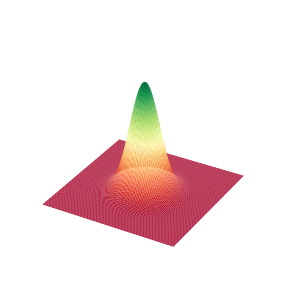

In [47]:
###
display(drawState(state))
###

In [48]:
#USING TENSOR VARIABLES & CALCULATING GRADIENT IN QUANTUM CIRCUIT

In [49]:
eng.reset()
prog = sf.Program(1)

alpha = prog.params("alpha")

with prog.context as q:
    Dgate(alpha) | q

# Assign our TensorFlow variables, so that we can
# refer to them later when differentiating/training.
a = tf.Variable(0.43)

with tf.GradientTape() as tape:
    # Here, we map our quantum free parameter `alpha`
    # to our TensorFlow variable `a` and pass it to the engine.

    result = eng.run(prog, args={"alpha": a})
    state = result.state

    # Note that all processing, including state-based post-processing,
    # must be done within the gradient tape context!
    mean, var = state.mean_photon(0) #gradient of the mean is recorded
#looks at the gradient over a small change of variable

# test that the gradient of the mean photon number is correct

grad = tape.gradient(mean, [a])
print("Gradient:", grad)

Gradient: [<tf.Tensor: shape=(), dtype=float32, numpy=0.85999966>]


In [50]:
print("Exact gradient:", 2 * a)
print("Exact and TensorFlow gradient agree:", np.allclose(grad, 2 * a))

Exact gradient: tf.Tensor(0.86, shape=(), dtype=float32)
Exact and TensorFlow gradient agree: True


In [51]:
#GETTING MEAN OF A CIRCUIT

In [52]:
eng.reset()
prog = sf.Program(2)

with prog.context as q:
    MeasureX | q[0]
    Dgate(sf.math.sin(q[0].par)) | q[1]

result = eng.run(prog)
print("Measured Homodyne sample from mode 0:", result.samples[0][0])

mean, var = result.state.mean_photon(0)
print("Mean photon number of mode 0:", mean)

mean, var = result.state.mean_photon(1)
print("Mean photon number of mode 1:", mean)

Measured Homodyne sample from mode 0: tf.Tensor((0.8545085+0j), shape=(), dtype=complex64)
Mean photon number of mode 0: tf.Tensor(0.0, shape=(), dtype=float32)
Mean photon number of mode 1: tf.Tensor(0.568874, shape=(), dtype=float32)


In [53]:
#VARIATIONAL SOLVER CIRCUIT

In [56]:
# initialize engine and program objects
eng = sf.Engine(backend="tf", backend_options={"cutoff_dim": cut_off_dim + 1})
circuit = sf.Program(1)

tf_alpha = tf.Variable(-6.0)
tf_phi = tf.Variable(np.pi/2)

alpha, phi = circuit.params("alpha", "phi")

with circuit.context as q:
    Dgate(alpha, phi) | q[0] #displacement

opt = tf.keras.optimizers.Adam(learning_rate=0.1)
steps = 1000

for step in range(steps):

    # reset the engine if it has already been executed
    if eng.run_progs:
        eng.reset()

    with tf.GradientTape() as tape:
        # execute the engine
        results = eng.run(circuit, args={"alpha": tf_alpha, "phi": tf_phi})
        # get the probability of fock state |1>
        prob = results.state.fock_prob([1])
        # negative sign to maximize prob
        loss = -prob

    gradients = tape.gradient(loss, [tf_alpha, tf_phi])
    opt.apply_gradients(zip(gradients, [tf_alpha, tf_phi]))
    print("Probability at step {}: {}".format(step, prob))
    ###
    #state = eng.run(circuit).state
    #display(drawState(state))
    ###
#BARREN PLATEUS - NO GRADIENT TO DO SIGNIFICANT LEARNING ON

Probability at step 0: 8.350281186994546e-15
Probability at step 1: 8.350281186994546e-15
Probability at step 2: 8.350281186994546e-15
Probability at step 3: 8.350281186994546e-15
Probability at step 4: 8.350281186994546e-15
Probability at step 5: 8.350281186994546e-15
Probability at step 6: 8.350281186994546e-15
Probability at step 7: 8.350281186994546e-15
Probability at step 8: 8.350281186994546e-15
Probability at step 9: 8.350281186994546e-15
Probability at step 10: 8.350281186994546e-15
Probability at step 11: 8.350281186994546e-15
Probability at step 12: 8.350281186994546e-15
Probability at step 13: 8.350281186994546e-15
Probability at step 14: 8.350281186994546e-15
Probability at step 15: 8.350281186994546e-15
Probability at step 16: 8.350281186994546e-15
Probability at step 17: 8.350281186994546e-15
Probability at step 18: 8.350281186994546e-15
Probability at step 19: 8.350281186994546e-15
Probability at step 20: 8.350281186994546e-15
Probability at step 21: 8.350281186994546e-1

Probability at step 187: 8.350281186994546e-15
Probability at step 188: 8.350281186994546e-15
Probability at step 189: 8.350281186994546e-15
Probability at step 190: 8.350281186994546e-15
Probability at step 191: 8.350281186994546e-15
Probability at step 192: 8.350281186994546e-15
Probability at step 193: 8.350281186994546e-15
Probability at step 194: 8.350281186994546e-15
Probability at step 195: 8.350281186994546e-15
Probability at step 196: 8.350281186994546e-15
Probability at step 197: 8.350281186994546e-15
Probability at step 198: 8.350281186994546e-15
Probability at step 199: 8.350281186994546e-15
Probability at step 200: 8.350281186994546e-15
Probability at step 201: 8.350281186994546e-15
Probability at step 202: 8.350281186994546e-15
Probability at step 203: 8.350281186994546e-15
Probability at step 204: 8.350281186994546e-15
Probability at step 205: 8.350281186994546e-15
Probability at step 206: 8.350281186994546e-15
Probability at step 207: 8.350281186994546e-15
Probability a

Probability at step 372: 8.350281186994546e-15
Probability at step 373: 8.350281186994546e-15
Probability at step 374: 8.350281186994546e-15
Probability at step 375: 8.350281186994546e-15
Probability at step 376: 8.350281186994546e-15
Probability at step 377: 8.350281186994546e-15
Probability at step 378: 8.350281186994546e-15
Probability at step 379: 8.350281186994546e-15
Probability at step 380: 8.350281186994546e-15
Probability at step 381: 8.350281186994546e-15
Probability at step 382: 8.350281186994546e-15
Probability at step 383: 8.350281186994546e-15
Probability at step 384: 8.350281186994546e-15
Probability at step 385: 8.350281186994546e-15
Probability at step 386: 8.350281186994546e-15
Probability at step 387: 8.350281186994546e-15
Probability at step 388: 8.350281186994546e-15
Probability at step 389: 8.350281186994546e-15
Probability at step 390: 8.350281186994546e-15
Probability at step 391: 8.350281186994546e-15
Probability at step 392: 8.350281186994546e-15
Probability a

Probability at step 552: 8.350281186994546e-15
Probability at step 553: 8.350281186994546e-15
Probability at step 554: 8.350281186994546e-15
Probability at step 555: 8.350281186994546e-15
Probability at step 556: 8.350281186994546e-15
Probability at step 557: 8.350281186994546e-15
Probability at step 558: 8.350281186994546e-15
Probability at step 559: 8.350281186994546e-15
Probability at step 560: 8.350281186994546e-15
Probability at step 561: 8.350281186994546e-15
Probability at step 562: 8.350281186994546e-15
Probability at step 563: 8.350281186994546e-15
Probability at step 564: 8.350281186994546e-15
Probability at step 565: 8.350281186994546e-15
Probability at step 566: 8.350281186994546e-15
Probability at step 567: 8.350281186994546e-15
Probability at step 568: 8.350281186994546e-15
Probability at step 569: 8.350281186994546e-15
Probability at step 570: 8.350281186994546e-15
Probability at step 571: 8.350281186994546e-15
Probability at step 572: 8.350281186994546e-15
Probability a

Probability at step 730: 8.350281186994546e-15
Probability at step 731: 8.350281186994546e-15
Probability at step 732: 8.350281186994546e-15
Probability at step 733: 8.350281186994546e-15
Probability at step 734: 8.350281186994546e-15
Probability at step 735: 8.350281186994546e-15
Probability at step 736: 8.350281186994546e-15
Probability at step 737: 8.350281186994546e-15
Probability at step 738: 8.350281186994546e-15
Probability at step 739: 8.350281186994546e-15
Probability at step 740: 8.350281186994546e-15
Probability at step 741: 8.350281186994546e-15
Probability at step 742: 8.350281186994546e-15
Probability at step 743: 8.350281186994546e-15
Probability at step 744: 8.350281186994546e-15
Probability at step 745: 8.350281186994546e-15
Probability at step 746: 8.350281186994546e-15
Probability at step 747: 8.350281186994546e-15
Probability at step 748: 8.350281186994546e-15
Probability at step 749: 8.350281186994546e-15
Probability at step 750: 8.350281186994546e-15
Probability a

Probability at step 916: 8.350281186994546e-15
Probability at step 917: 8.350281186994546e-15
Probability at step 918: 8.350281186994546e-15
Probability at step 919: 8.350281186994546e-15
Probability at step 920: 8.350281186994546e-15
Probability at step 921: 8.350281186994546e-15
Probability at step 922: 8.350281186994546e-15
Probability at step 923: 8.350281186994546e-15
Probability at step 924: 8.350281186994546e-15
Probability at step 925: 8.350281186994546e-15
Probability at step 926: 8.350281186994546e-15
Probability at step 927: 8.350281186994546e-15
Probability at step 928: 8.350281186994546e-15
Probability at step 929: 8.350281186994546e-15
Probability at step 930: 8.350281186994546e-15
Probability at step 931: 8.350281186994546e-15
Probability at step 932: 8.350281186994546e-15
Probability at step 933: 8.350281186994546e-15
Probability at step 934: 8.350281186994546e-15
Probability at step 935: 8.350281186994546e-15
Probability at step 936: 8.350281186994546e-15
Probability a

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-6.0>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.5707964>
tf.Tensor(2.3195227e-16, shape=(), dtype=float32)
tf.Tensor(8.350281e-15, shape=(), dtype=float32)
tf.Tensor(1.5030507e-13, shape=(), dtype=float32)
tf.Tensor(1.803661e-12, shape=(), dtype=float32)
tf.Tensor(1.6232949e-11, shape=(), dtype=float32)
tf.Tensor(1.1687723e-10, shape=(), dtype=float32)


None

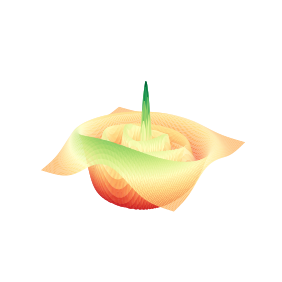

In [57]:
print(tf_alpha)
print(tf_phi)
# get the probability of fock state |i>
for i in range(cut_off_dim):
    prob = results.state.fock_prob([i])
    print(prob)
state = results.state
display(drawState(state))

In [64]:
# initialize engine and program objects
eng = sf.Engine(backend="tf", backend_options={"cutoff_dim": cut_off_dim + 1})
circuit = sf.Program(1)

tf_alpha = tf.Variable(-6.0)
tf_phi = tf.Variable(np.pi/2)

alpha, phi = circuit.params("alpha", "phi")

with circuit.context as q:
    Dgate(alpha, phi) | q[0] #displacement

opt = tf.keras.optimizers.Adam(learning_rate=0.1)
steps = 1000

for step in range(steps):

    # reset the engine if it has already been executed
    if eng.run_progs:
        eng.reset()

    with tf.GradientTape() as tape:
        # execute the engine
        results = eng.run(circuit, args={"alpha": tf_alpha, "phi": tf_phi})
        # get the probability of fock state |1>
        prob = results.state.fock_prob([5])
        # negative sign to maximize prob
        loss = -prob

    gradients = tape.gradient(loss, [tf_alpha, tf_phi])
    opt.apply_gradients(zip(gradients, [tf_alpha, tf_phi]))
    print("Probability at step {}: {}".format(step, prob))
    ###
    #state = eng.run(circuit).state
    #display(drawState(state))
    ###
#BARREN PLATEUS - NO GRADIENT TO DO SIGNIFICANT LEARNING ON

Probability at step 0: 1.168772301163301e-10
Probability at step 1: 1.1692334600521548e-10
Probability at step 2: 1.1698846058560974e-10
Probability at step 3: 1.1706859093241206e-10
Probability at step 4: 1.1716089209912184e-10
Probability at step 5: 1.1726425386271444e-10
Probability at step 6: 1.1737756600016525e-10
Probability at step 7: 1.1750025952217413e-10
Probability at step 8: 1.1763114093898963e-10
Probability at step 9: 1.177703073951264e-10
Probability at step 10: 1.179171760234965e-10
Probability at step 11: 1.1807183009082678e-10
Probability at step 12: 1.1823360346330247e-10
Probability at step 13: 1.1840205205171372e-10
Probability at step 14: 1.1857714810048492e-10
Probability at step 15: 1.1875891936519167e-10
Probability at step 16: 1.1894746299034864e-10
Probability at step 17: 1.1914212671992885e-10
Probability at step 18: 1.1934297994287135e-10
Probability at step 19: 1.1954945366987602e-10
Probability at step 20: 1.19762186279182e-10
Probability at step 21: 1.19

Probability at step 177: 2.704304002953961e-10
Probability at step 178: 2.732352677448091e-10
Probability at step 179: 2.7610200237226934e-10
Probability at step 180: 2.790332132018847e-10
Probability at step 181: 2.820302880124359e-10
Probability at step 182: 2.8509611338378704e-10
Probability at step 183: 2.8823202158356764e-10
Probability at step 184: 2.9144106572509543e-10
Probability at step 185: 2.947262434105369e-10
Probability at step 186: 2.980880819958287e-10
Probability at step 187: 3.0153091135076693e-10
Probability at step 188: 3.050567576323715e-10
Probability at step 189: 3.0866911804317e-10
Probability at step 190: 3.1237148978568996e-10
Probability at step 191: 3.1616609330598067e-10
Probability at step 192: 3.2005656458444776e-10
Probability at step 193: 3.240453461117454e-10
Probability at step 194: 3.281381000252992e-10
Probability at step 195: 3.323372410601877e-10
Probability at step 196: 3.3664745990868994e-10
Probability at step 197: 3.410729754182995e-10
Probab

Probability at step 373: 0.1754639893770218
Probability at step 374: 0.17546683549880981
Probability at step 375: 0.17545881867408752
Probability at step 376: 0.17544817924499512
Probability at step 377: 0.17544351518154144
Probability at step 378: 0.17544753849506378
Probability at step 379: 0.17545679211616516
Probability at step 380: 0.1754649132490158
Probability at step 381: 0.1754673272371292
Probability at step 382: 0.17546409368515015
Probability at step 383: 0.17545899748802185
Probability at step 384: 0.17545616626739502
Probability at step 385: 0.17545747756958008
Probability at step 386: 0.17546169459819794
Probability at step 387: 0.17546580731868744
Probability at step 388: 0.175467386841774
Probability at step 389: 0.1754661351442337
Probability at step 390: 0.17546363174915314
Probability at step 391: 0.17546209692955017
Probability at step 392: 0.1754625141620636
Probability at step 393: 0.17546440660953522
Probability at step 394: 0.17546647787094116
Probability at st

Probability at step 561: 0.1754673570394516
Probability at step 562: 0.1754673570394516
Probability at step 563: 0.17546740174293518
Probability at step 564: 0.17546740174293518
Probability at step 565: 0.17546740174293518
Probability at step 566: 0.17546740174293518
Probability at step 567: 0.17546740174293518
Probability at step 568: 0.17546740174293518
Probability at step 569: 0.1754673570394516
Probability at step 570: 0.1754673570394516
Probability at step 571: 0.1754673570394516
Probability at step 572: 0.1754673570394516
Probability at step 573: 0.1754673570394516
Probability at step 574: 0.1754673570394516
Probability at step 575: 0.1754673570394516
Probability at step 576: 0.1754673570394516
Probability at step 577: 0.1754673570394516
Probability at step 578: 0.17546740174293518
Probability at step 579: 0.17546740174293518
Probability at step 580: 0.17546740174293518
Probability at step 581: 0.17546740174293518
Probability at step 582: 0.17546740174293518
Probability at step 5

Probability at step 752: 0.1754673570394516
Probability at step 753: 0.1754673570394516
Probability at step 754: 0.1754673570394516
Probability at step 755: 0.1754673570394516
Probability at step 756: 0.1754673570394516
Probability at step 757: 0.1754673570394516
Probability at step 758: 0.1754673570394516
Probability at step 759: 0.1754673570394516
Probability at step 760: 0.1754673570394516
Probability at step 761: 0.1754673570394516
Probability at step 762: 0.1754673570394516
Probability at step 763: 0.1754673570394516
Probability at step 764: 0.1754673570394516
Probability at step 765: 0.1754673570394516
Probability at step 766: 0.1754673570394516
Probability at step 767: 0.1754673570394516
Probability at step 768: 0.1754673570394516
Probability at step 769: 0.1754673570394516
Probability at step 770: 0.1754673570394516
Probability at step 771: 0.1754673570394516
Probability at step 772: 0.1754673570394516
Probability at step 773: 0.1754673570394516
Probability at step 774: 0.17546

Probability at step 952: 0.1754673570394516
Probability at step 953: 0.1754673570394516
Probability at step 954: 0.1754673570394516
Probability at step 955: 0.1754673570394516
Probability at step 956: 0.1754673570394516
Probability at step 957: 0.1754673570394516
Probability at step 958: 0.1754673570394516
Probability at step 959: 0.1754673570394516
Probability at step 960: 0.1754673570394516
Probability at step 961: 0.1754673570394516
Probability at step 962: 0.1754673570394516
Probability at step 963: 0.1754673570394516
Probability at step 964: 0.1754673570394516
Probability at step 965: 0.1754673570394516
Probability at step 966: 0.1754673570394516
Probability at step 967: 0.1754673570394516
Probability at step 968: 0.1754673570394516
Probability at step 969: 0.1754673570394516
Probability at step 970: 0.1754673570394516
Probability at step 971: 0.1754673570394516
Probability at step 972: 0.1754673570394516
Probability at step 973: 0.1754673570394516
Probability at step 974: 0.17546

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-2.236068>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.5707964>
tf.Tensor(0.0067379456, shape=(), dtype=float32)
tf.Tensor(0.033689726, shape=(), dtype=float32)
tf.Tensor(0.08422432, shape=(), dtype=float32)
tf.Tensor(0.14037389, shape=(), dtype=float32)
tf.Tensor(0.17546736, shape=(), dtype=float32)
tf.Tensor(0.17546736, shape=(), dtype=float32)


None

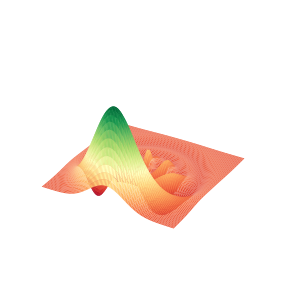

In [65]:
print(tf_alpha)
print(tf_phi)
# get the probability of fock state |i>
for i in range(cut_off_dim):
    prob = results.state.fock_prob([i])
    print(prob)
state = results.state
display(drawState(state))

In [66]:
#modified wigner
def wigner(rho):
    """This code is a modified version of the 'iterative' method
    of the wigner function provided in QuTiP, which is released
    under the BSD license, with the following copyright notice:

    Copyright (C) 2011 and later, P.D. Nation, J.R. Johansson,
    A.J.G. Pitchford, C. Granade, and A.L. Grimsmo.

    All rights reserved."""
    import copy
    l = 5.0
    cutoff = rho.shape[0]
    x = np.linspace(-l, l, 100)
    p = np.linspace(-l, l, 100)
    Q, P = np.meshgrid(x, p)
    A = (Q + P * 1.0j) / (2 * np.sqrt(2 / 2))
    Wlist = np.array([np.zeros(np.shape(A), dtype=complex) for k in range(cutoff)])
    Wlist[0] = np.exp(-2.0 * np.abs(A) ** 2) / np.pi
    W = np.real(rho[0, 0]) * np.real(Wlist[0])
    for n in range(1, cutoff):
        Wlist[n] = (2.0 * A * Wlist[n - 1]) / np.sqrt(n)
        W += 2 * np.real(rho[0, n] * Wlist[n])
    for m in range(1, cutoff):
        temp = copy.copy(Wlist[m])
        Wlist[m] = (2 * np.conj(A) * temp - np.sqrt(m) * Wlist[m - 1]) / np.sqrt(m)
        W += np.real(rho[m, m] * Wlist[m])
        for n in range(m + 1, cutoff):
            temp2 = (2 * A * Wlist[n - 1] - np.sqrt(m) * temp) / np.sqrt(n)
            temp = copy.copy(Wlist[n])
            Wlist[n] = temp2
            W += 2 * np.real(rho[m, n] * Wlist[n])
    return Q, P, W / 2

In [67]:
def drawStateWigner(rho):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    X, P, W = wigner(rho)
    ax.plot_surface(X, P, W, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
    ax.contour(X, P, W, 10, cmap="RdYlGn", linestyles="solid", offset=-0.17)
    ax.set_axis_off()
    fig.show()

In [68]:
#Combining Rotation Gates, Displacement Gates, Kerr Gates <- Full Set of Gates to create ANY possible State
#How do we get the values for the gates of a specific state? -> Machine Learning

In [69]:
# Cutoff dimension
cutoff = 9

# Number of layers
depth = 15

# Number of steps in optimization routine performing gradient descent
reps = 50

# Learning rate
lr = 0.05

# Standard deviation of initial parameters
passive_sd = 0.1
active_sd = 0.001

In [70]:
# set the random seed
tf.random.set_seed(42)

# squeeze gate
sq_r = tf.random.normal(shape=[depth], stddev=active_sd)
sq_phi = tf.random.normal(shape=[depth], stddev=passive_sd)

# displacement gate
d_r = tf.random.normal(shape=[depth], stddev=active_sd)
d_phi = tf.random.normal(shape=[depth], stddev=passive_sd)

# rotation gates
r1 = tf.random.normal(shape=[depth], stddev=passive_sd)
r2 = tf.random.normal(shape=[depth], stddev=passive_sd)

# kerr gate
kappa = tf.random.normal(shape=[depth], stddev=active_sd)

In [71]:
weights = tf.convert_to_tensor([r1, sq_r, sq_phi, r2, d_r, d_phi, kappa])
weights = tf.Variable(tf.transpose(weights))

In [72]:
# Single-mode Strawberry Fields program
prog = sf.Program(1)

# Create the 7 Strawberry Fields free parameters for each layer
sf_params = []
names = ["r1", "sq_r", "sq_phi", "r2", "d_r", "d_phi", "kappa"]

for i in range(depth):
    # For the ith layer, generate parameter names "r1_i", "sq_r_i", etc.
    sf_params_names = ["{}_{}".format(n, i) for n in names]
    # Create the parameters, and append them to our list ``sf_params``.
    sf_params.append(prog.params(*sf_params_names))

In [74]:
# layer architecture
from strawberryfields.utils import operation
@operation(1)
def layer(i, q):
    Rgate(sf_params[i][0]) | q
    Sgate(sf_params[i][1], sf_params[i][2]) | q
    Rgate(sf_params[i][3]) | q
    Dgate(sf_params[i][4], sf_params[i][5]) | q
    Kgate(sf_params[i][6]) | q
    return q

In [77]:
with prog.context as q:
    for k in range(depth):
        layer(k) | q[0]

In [78]:
eng = sf.Engine("tf", backend_options={"cutoff_dim": cutoff})


In [79]:
target_state = np.zeros([cutoff])
target_state[1] = 1 #Fock State of 2
print(target_state)

[0. 1. 0. 0. 0. 0. 0. 0. 0.]


C:\Users\SUPRATIM SENGUPTA\AppData\Local\Temp\ipykernel_12600\27249930.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


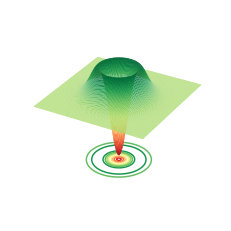

In [80]:
rho_target = np.outer(target_state, target_state.conj())
drawStateWigner(rho_target)

In [81]:
def cost(weights):
    # Create a dictionary mapping from the names of the Strawberry Fields
    # free parameters to the TensorFlow weight values.
    flat_list = [item for sublist in sf_params for item in sublist]
    mapping = {p.name: w for p, w in zip(flat_list, tf.reshape(weights, [-1]))}

    # Run engine
    state = eng.run(prog, args=mapping).state

    # Extract the statevector
    ket = state.ket()

    # Compute the fidelity between the output statevector
    # and the target state.
    fidelity = tf.abs(tf.reduce_sum(tf.math.conj(ket) * target_state)) ** 2

    # Objective function to minimize
    cost = tf.abs(tf.reduce_sum(tf.math.conj(ket) * target_state) - 1)
    return cost, fidelity, ket

In [82]:
opt = tf.keras.optimizers.Adam(learning_rate=lr)

Rep: 0 Cost: 0.9947 Fidelity: 0.0000


C:\Users\SUPRATIM SENGUPTA\AppData\Local\Temp\ipykernel_12600\27249930.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


None

Rep: 1 Cost: 1.0952 Fidelity: 0.4664


None

Rep: 2 Cost: 0.7261 Fidelity: 0.0750


None

Rep: 3 Cost: 0.9234 Fidelity: 0.0269


None

Rep: 4 Cost: 0.7271 Fidelity: 0.0954


None

Rep: 5 Cost: 0.8803 Fidelity: 0.0276


None

Rep: 6 Cost: 0.8177 Fidelity: 0.0442


None

Rep: 7 Cost: 1.0846 Fidelity: 0.0290


None

Rep: 8 Cost: 0.6529 Fidelity: 0.1247


None

Rep: 9 Cost: 1.4903 Fidelity: 0.4733


None

Rep: 10 Cost: 1.4090 Fidelity: 0.5238


None

Rep: 11 Cost: 0.8582 Fidelity: 0.0314


None

Rep: 12 Cost: 0.8173 Fidelity: 0.0355


None

Rep: 13 Cost: 1.0328 Fidelity: 0.0566


None

Rep: 14 Cost: 0.7886 Fidelity: 0.0624


None

Rep: 15 Cost: 0.8198 Fidelity: 0.0516


None

Rep: 16 Cost: 0.7162 Fidelity: 0.0896


None

Rep: 17 Cost: 0.6672 Fidelity: 0.1111


None

Rep: 18 Cost: 0.6276 Fidelity: 0.2356


None

Rep: 19 Cost: 0.6611 Fidelity: 0.1838


None

Rep: 20 Cost: 0.5151 Fidelity: 0.2352


C:\Users\SUPRATIM SENGUPTA\AppData\Local\Temp\ipykernel_12600\27249930.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


None

Rep: 21 Cost: 0.7001 Fidelity: 0.2771


None

Rep: 22 Cost: 0.6113 Fidelity: 0.1511


None

Rep: 23 Cost: 0.6282 Fidelity: 0.1793


None

Rep: 24 Cost: 0.5561 Fidelity: 0.2050


None

Rep: 25 Cost: 0.5701 Fidelity: 0.1853


None

Rep: 26 Cost: 0.5118 Fidelity: 0.2399


None

Rep: 27 Cost: 0.4885 Fidelity: 0.2626


None

Rep: 28 Cost: 0.4795 Fidelity: 0.2888


None

Rep: 29 Cost: 0.5264 Fidelity: 0.2293


None

Rep: 30 Cost: 0.5032 Fidelity: 0.2897


None

Rep: 31 Cost: 0.3959 Fidelity: 0.3902


None

Rep: 32 Cost: 0.5307 Fidelity: 0.3492


None

Rep: 33 Cost: 0.6159 Fidelity: 0.2026


None

Rep: 34 Cost: 0.5832 Fidelity: 0.3214


None

Rep: 35 Cost: 0.4032 Fidelity: 0.3622


None

Rep: 36 Cost: 0.5970 Fidelity: 0.3634


None

Rep: 37 Cost: 0.4004 Fidelity: 0.3742


None

Rep: 38 Cost: 0.5067 Fidelity: 0.3497


None

Rep: 39 Cost: 0.5266 Fidelity: 0.4577


None

Rep: 40 Cost: 0.5211 Fidelity: 0.4712


None

Rep: 41 Cost: 0.4569 Fidelity: 0.5383


None

Rep: 42 Cost: 0.6172 Fidelity: 0.5652


None

Rep: 43 Cost: 0.6789 Fidelity: 0.5729


None

Rep: 44 Cost: 0.2582 Fidelity: 0.5824


None

Rep: 45 Cost: 0.6926 Fidelity: 0.5099


None

Rep: 46 Cost: 0.6329 Fidelity: 0.4803


None

Rep: 47 Cost: 0.2196 Fidelity: 0.6090


None

Rep: 48 Cost: 0.6401 Fidelity: 0.6873


None

Rep: 49 Cost: 0.6192 Fidelity: 0.6939


None

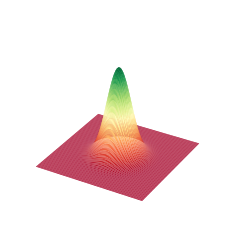

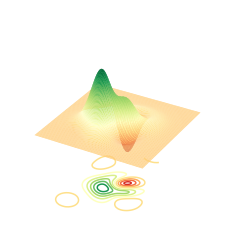

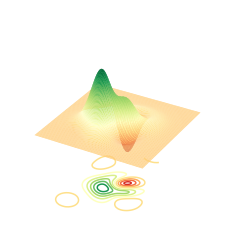

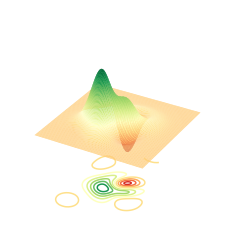

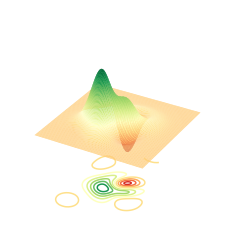

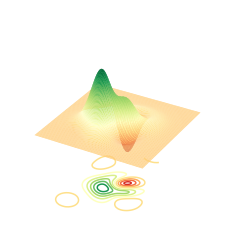

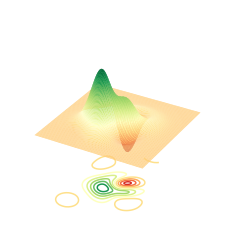

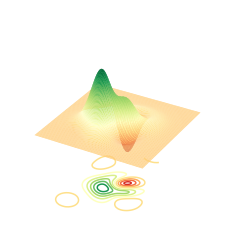

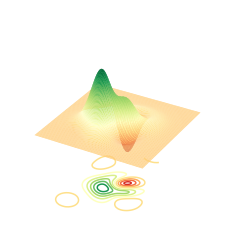

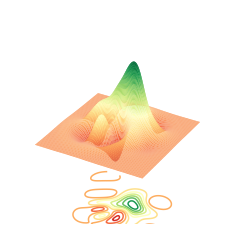

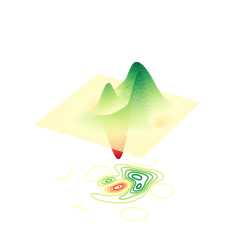

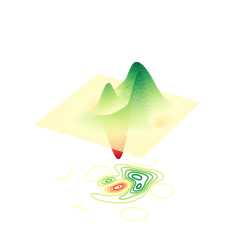

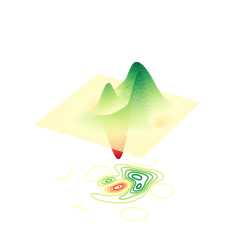

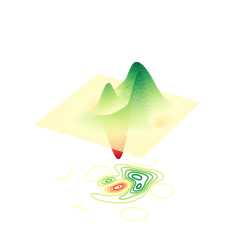

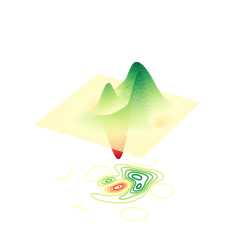

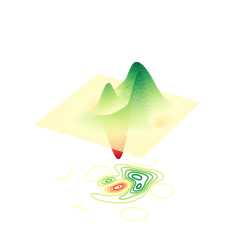

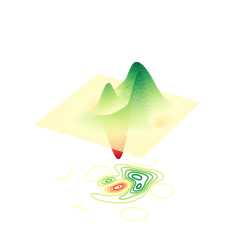

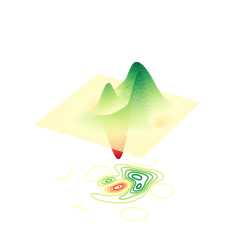

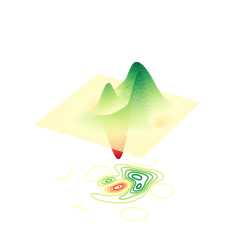

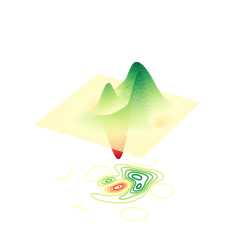

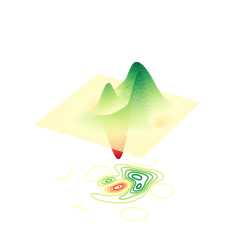

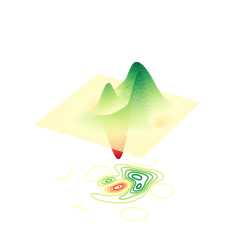

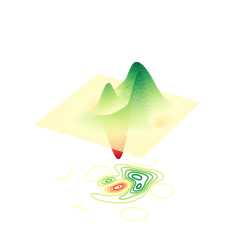

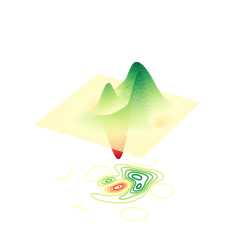

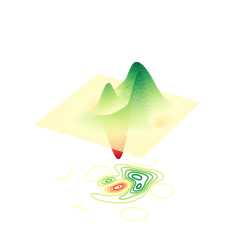

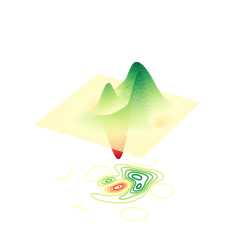

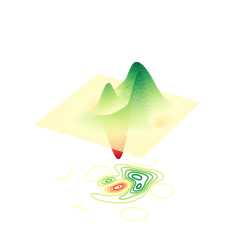

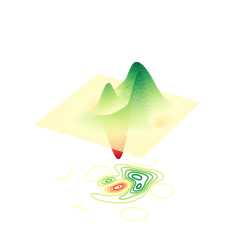

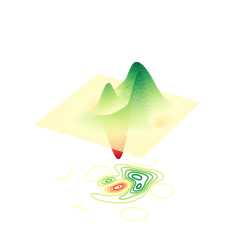

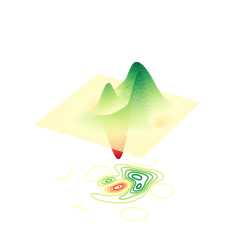

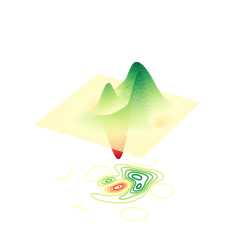

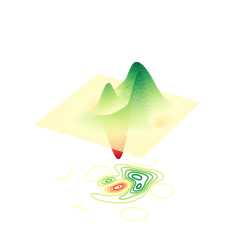

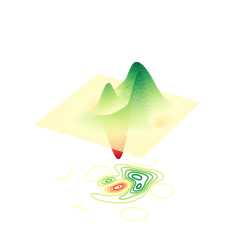

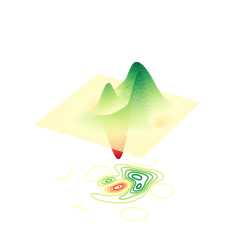

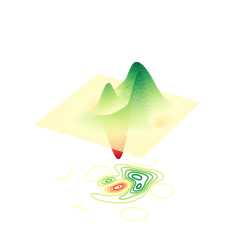

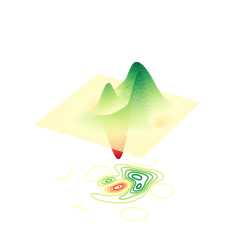

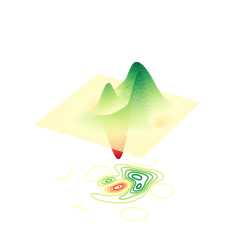

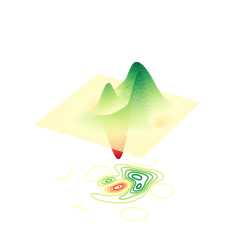

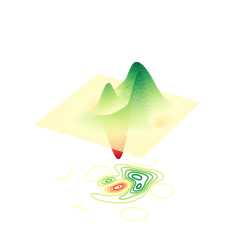

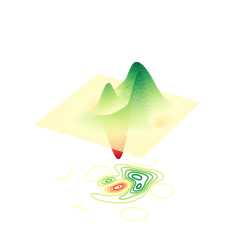

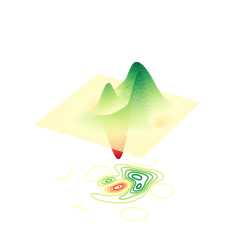

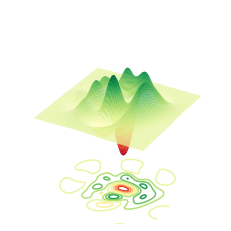

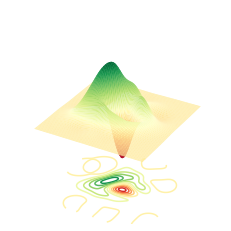

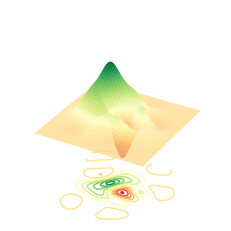

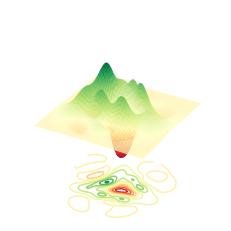

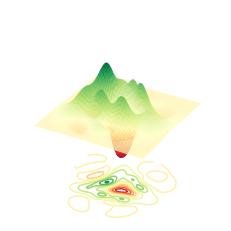

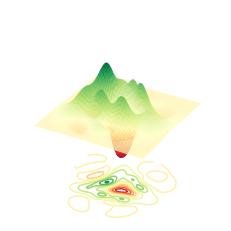

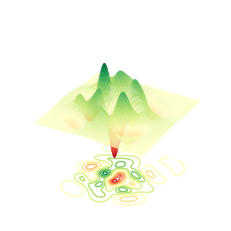

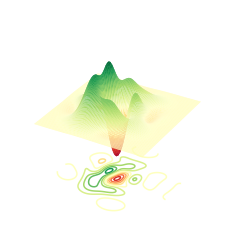

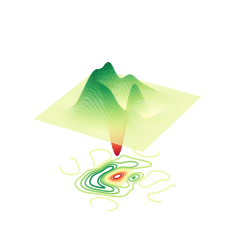

In [83]:
fid_progress = []
best_fid = 0

for i in range(reps):
    # reset the engine if it has already been executed
    if eng.run_progs:
        eng.reset()

    with tf.GradientTape() as tape:
        loss, fid, ket = cost(weights)

    # Stores fidelity at each step
    fid_progress.append(fid.numpy())

    if fid > best_fid:
        # store the new best fidelity and best state
        best_fid = fid.numpy()
        learnt_state = ket.numpy()

    # one repetition of the optimization
    gradients = tape.gradient(loss, weights)
    opt.apply_gradients(zip([gradients], [weights]))

    # Prints progress at every rep
    if i % 1 == 0:
        print("Rep: {} Cost: {:.4f} Fidelity: {:.4f}".format(i, loss, fid))
    ###
    rho_learnt = np.outer(learnt_state, learnt_state.conj())
    display(drawStateWigner(rho_learnt))
    ###

Text(0.5, 0, 'Step')

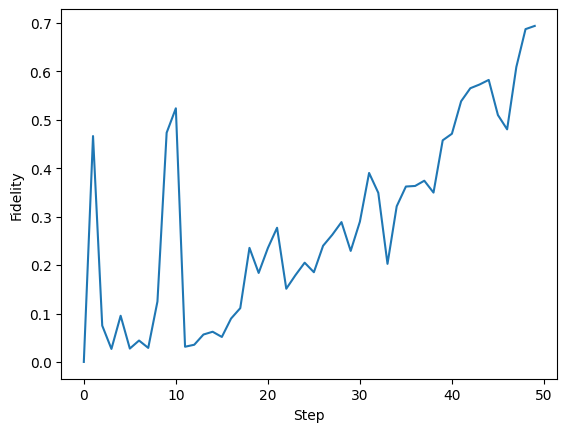

In [84]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.sans-serif"] = ["Computer Modern Roman"]
plt.style.use("default")

plt.plot(fid_progress)
plt.ylabel("Fidelity")
plt.xlabel("Step")

In [85]:
rho_target = np.outer(target_state, target_state.conj())
rho_learnt = np.outer(learnt_state, learnt_state.conj())

C:\Users\SUPRATIM SENGUPTA\AppData\Local\Temp\ipykernel_12600\27249930.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


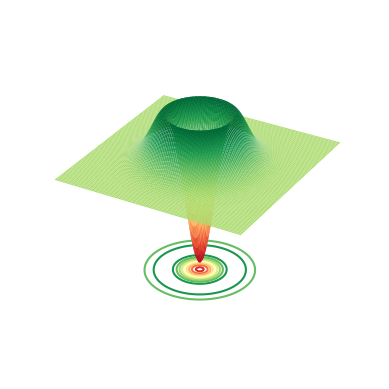

In [86]:
drawStateWigner(rho_target)

C:\Users\SUPRATIM SENGUPTA\AppData\Local\Temp\ipykernel_12600\27249930.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


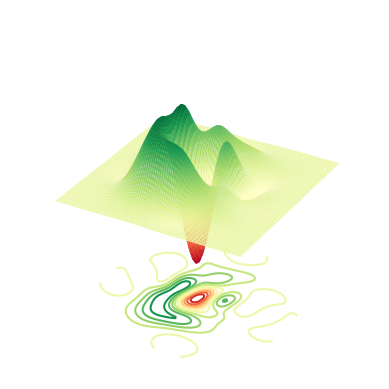

In [87]:
drawStateWigner(rho_learnt)

In [88]:
import pennylane as qml
from pennylane import qchem
from pennylane import numpy as np

In [89]:
geometry = 'h2.xyz' #Download this file
charge = 0
multiplicity = 1
basis_set = 'sto-3g' #Minimal Basis - For Simulation

In [91]:
symbols, coordinates = qchem.read_structure(geometry)

h, qubits = qchem.molecular_hamiltonian(
    symbols,
    coordinates,
    charge=charge,
    mult=multiplicity,
    basis=basis_set,
    active_electrons=2,
    active_orbitals=2,
    mapping='jordan_wigner'
)

print('Number of qubits = ', qubits)
print('Hamiltonian is ', h)

Number of qubits =  4
Hamiltonian is    (-0.24274280046621832) [Z2]
+ (-0.24274280046621832) [Z3]
+ (-0.04207898539335009) [I0]
+ (0.1777128750266124) [Z1]
+ (0.17771287502661243) [Z0]
+ (0.12293305045326262) [Z0 Z2]
+ (0.12293305045326262) [Z1 Z3]
+ (0.16768319431901813) [Z0 Z3]
+ (0.16768319431901813) [Z1 Z2]
+ (0.17059738365081573) [Z0 Z1]
+ (0.17627640722432758) [Z2 Z3]
+ (-0.044750143865755536) [Y0 Y1 X2 X3]
+ (-0.044750143865755536) [X0 X1 Y2 Y3]
+ (0.044750143865755536) [Y0 X1 X2 Y3]
+ (0.044750143865755536) [X0 Y1 Y2 X3]


In [92]:
dev = qml.device('default.qubit', wires=qubits) #Regular Qubits, NOT QUMODES

In [93]:
def circuit(params, wires):
    """
    Instead of circ.h, circ.cx, we have qml.BasisState (initialization) & qml.CNOT
    """
    qml.BasisState(np.array([1, 1, 0, 0], requires_grad=False), wires=wires)
    for i in wires:
        qml.Rot(*params[i], wires=i)
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[2, 0])
    qml.CNOT(wires=[3, 1])

In [94]:
cost_fn = qml.ExpvalCost(circuit, h, dev) #Takes Circuit, Hamiltonian & Backend
opt = qml.GradientDescentOptimizer(stepsize=0.4) #Optimizer
np.random.seed(0)
params = np.random.normal(0, np.pi, (qubits, 3))

print(params)

#Overtime, range rotation gates to MINIMIZE Hamiltonian using Machine Learning

[[ 5.54193389  1.25713095  3.07479606]
 [ 7.03997361  5.86710646 -3.07020901]
 [ 2.98479079 -0.47550269 -0.32427159]
 [ 1.28993324  0.45252622  4.56873497]]


C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\pennylane\vqe\vqe.py:154: UserWarning: ExpvalCost is deprecated, use qml.expval() instead. For optimizing Hamiltonian measurements with measuring commuting terms in parallel, use the grouping_type keyword in qml.Hamiltonian.


In [95]:
max_iterations = 200
conv_tol = 1e-06


for n in range(max_iterations):
    params, prev_energy = opt.step_and_cost(cost_fn, params)
    energy = cost_fn(params)
    conv = np.abs(energy - prev_energy)

    if n % 20 == 0:
        print('Iteration = {:},  Energy = {:.8f} Ha'.format(n, energy))

    if conv <= conv_tol:
        break

print()
print('Final convergence parameter = {:.8f} Ha'.format(conv))
print('Final value of the ground-state energy = {:.8f} Ha'.format(energy))
print('Accuracy with respect to the FCI energy: {:.8f} Ha ({:.8f} kcal/mol)'.format(
    np.abs(energy - (-1.136189454088)), np.abs(energy - (-1.136189454088))*627.503
    )
)
print()
print('Final circuit parameters = \n', params)

Iteration = 0,  Energy = -0.88179557 Ha
Iteration = 20,  Energy = -1.13380513 Ha
Iteration = 40,  Energy = -1.13558756 Ha
Iteration = 60,  Energy = -1.13585794 Ha
Iteration = 80,  Energy = -1.13600617 Ha
Iteration = 100,  Energy = -1.13608848 Ha
Iteration = 120,  Energy = -1.13613394 Ha

Final convergence parameter = 0.00000099 Ha
Final value of the ground-state energy = -1.13615709 Ha
Accuracy with respect to the FCI energy: 0.00003237 Ha (0.02031086 kcal/mol)

Final circuit parameters = 
 [[ 5.54193389e+00  1.30219526e-08  3.07479606e+00]
 [ 7.03997361e+00  6.28318530e+00 -3.07020901e+00]
 [ 2.98479079e+00 -2.09540999e-01 -4.16893294e-02]
 [ 1.28993324e+00  1.30907820e-12  4.56873497e+00]]
